In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
color_dict = {'reddit': '#FF5700',
              'twitter': '#00acee',
              'youtube': '#FF0000'}

In [3]:
ex_daily_df = pd.read_csv('extrinsic_hot_prevalence_estimation_2022.csv')
ex_daily_df.index = ex_daily_df.date
ex_daily_df.index = pd.to_datetime(ex_daily_df.index)

in_daily_df = pd.read_csv('intrinsic_hot_prevalence_estimation_2022.csv')
in_daily_df.index = in_daily_df.date
in_daily_df.index = pd.to_datetime(in_daily_df.index)

In [4]:
def visualize_time_series(data_df):
    fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharey=True)

    platform_list = ['reddit', 'twitter', 'youtube']
    metric_list = ['hot', 'hate', 'offensive', 'toxic']
    for ax_idx, metric in enumerate(metric_list):
        for platform in platform_list:
            color = color_dict[platform]

            axes[ax_idx].plot_date(
                data_df.index, 
                eval(f'data_df.{platform}_{metric}_list') / eval(f'data_df.{platform}_num_comment_list') * 100, 
                '-o', color=color, mfc='none', ms=2, label=platform)
            axes[ax_idx].fill_between(
                data_df.index, 
                eval(f'data_df.{platform}_{metric}_ub_list') / eval(f'data_df.{platform}_num_comment_list') * 100, 
                eval(f'data_df.{platform}_{metric}_lb_list') / eval(f'data_df.{platform}_num_comment_list') * 100, 
                color=color, alpha=0.2)

            axes[ax_idx].set_title(metric, fontsize=16)

    for ax in axes.ravel():
        # ax.legend(frameon=False, fontsize=14)
        ax.set_ylabel('prevalence', fontsize=16)
        ax.tick_params(axis='both', which='major', labelsize=14)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

    plt.tight_layout()

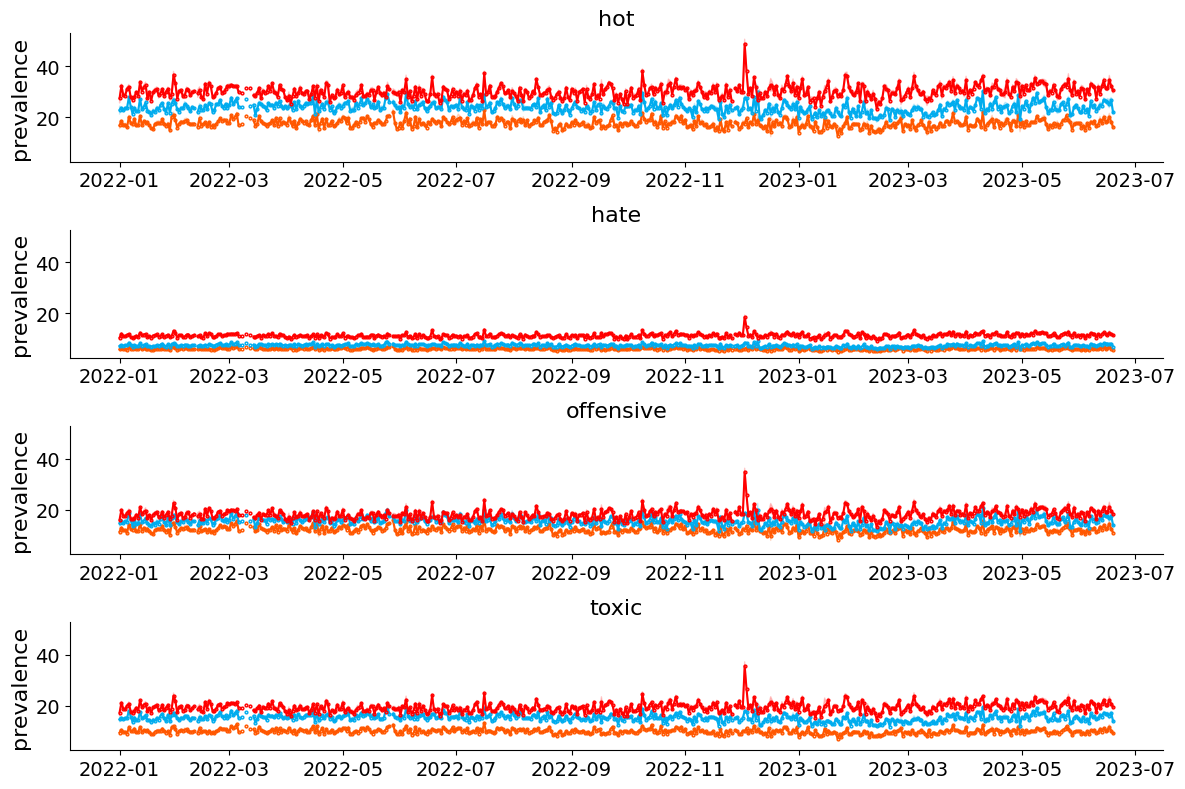

In [5]:
visualize_time_series(ex_daily_df)

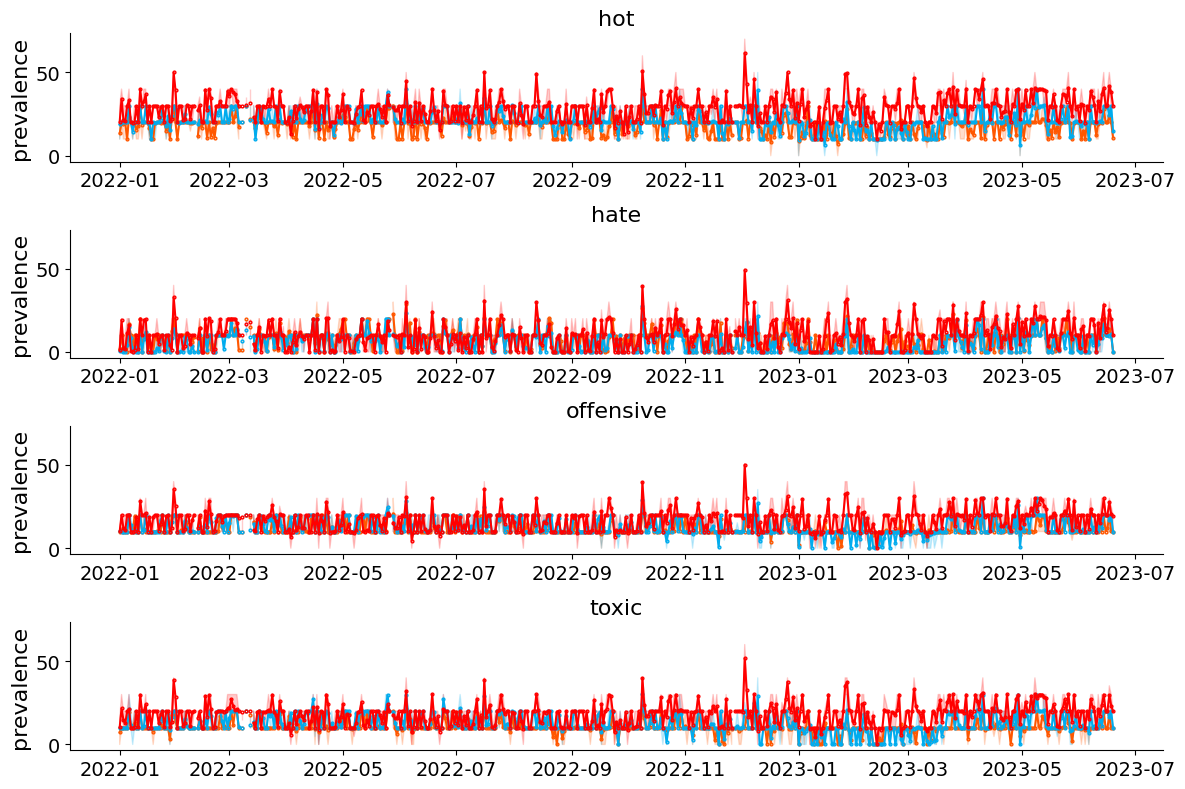

In [6]:
visualize_time_series(in_daily_df)

## Group by week

In [7]:
ex_weekly_df = ex_daily_df.resample('W-Mon').sum().reset_index()
ex_weekly_df.index = ex_weekly_df.date
ex_weekly_df.index = pd.to_datetime(ex_weekly_df.index)

in_weekly_df = in_daily_df.resample('W-Mon').sum().reset_index()
in_weekly_df.index = in_weekly_df.date
in_weekly_df.index = pd.to_datetime(in_weekly_df.index)

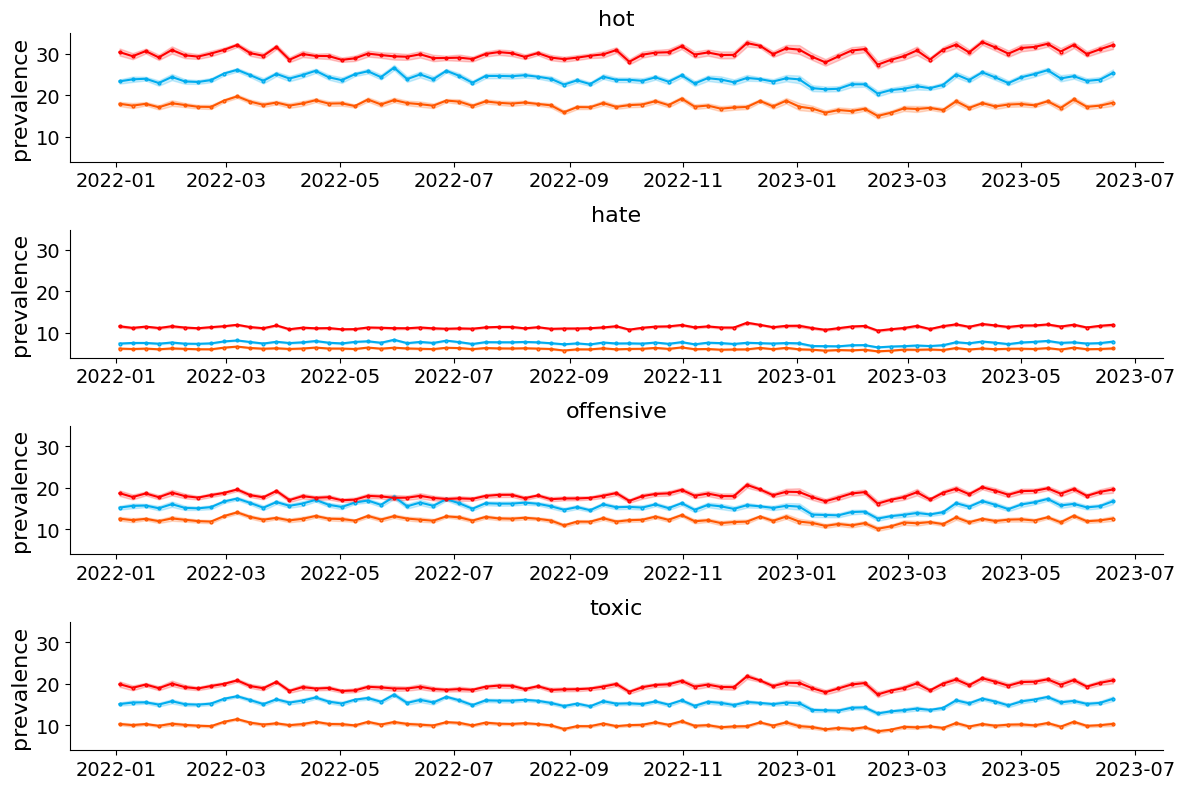

In [8]:
visualize_time_series(ex_weekly_df)

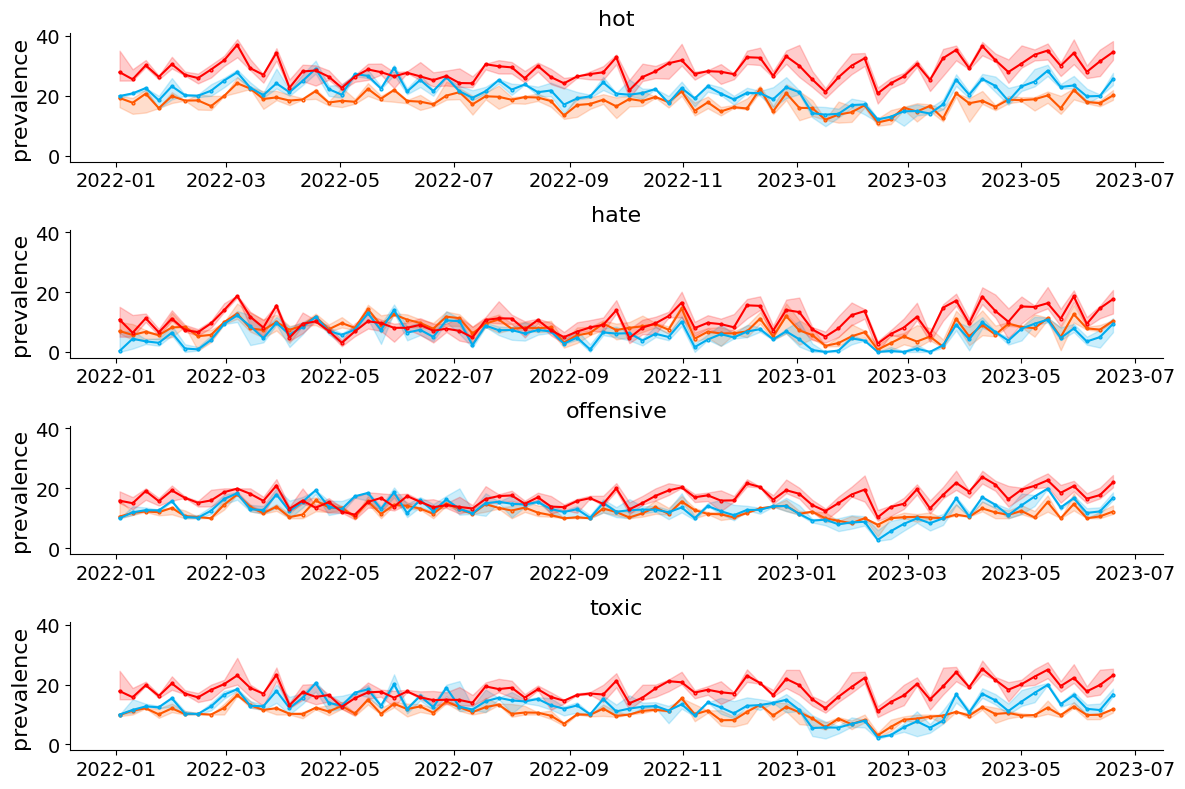

In [9]:
visualize_time_series(in_weekly_df)

In [10]:
def visualize_time_series2(data_df):
    fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharey=True)

    platform_list = ['reddit', 'twitter', 'youtube']
    for ax_idx, platform in enumerate(platform_list):
        color = color_dict[platform]

        axes[ax_idx].plot_date(
            data_df.index, 
            eval(f'data_df.{platform}_hot_list') / eval(f'data_df.{platform}_num_comment_list') * 100, 
            '-o', color=color, mfc='none', ms=5, label=platform)
        axes[ax_idx].fill_between(
            data_df.index, 
            eval(f'data_df.{platform}_hot_ub_list') / eval(f'data_df.{platform}_num_comment_list') * 100, 
            eval(f'data_df.{platform}_hot_lb_list') / eval(f'data_df.{platform}_num_comment_list') * 100, 
            color=color, alpha=0.2)
        axes[ax_idx].set_xlabel(platform, fontsize=16)

    for ax in axes.ravel():
        # ax.legend(frameon=False, fontsize=14)
        ax.set_ylabel('prevalence', fontsize=16)
        ax.tick_params(axis='both', which='major', labelsize=14)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

    plt.tight_layout()

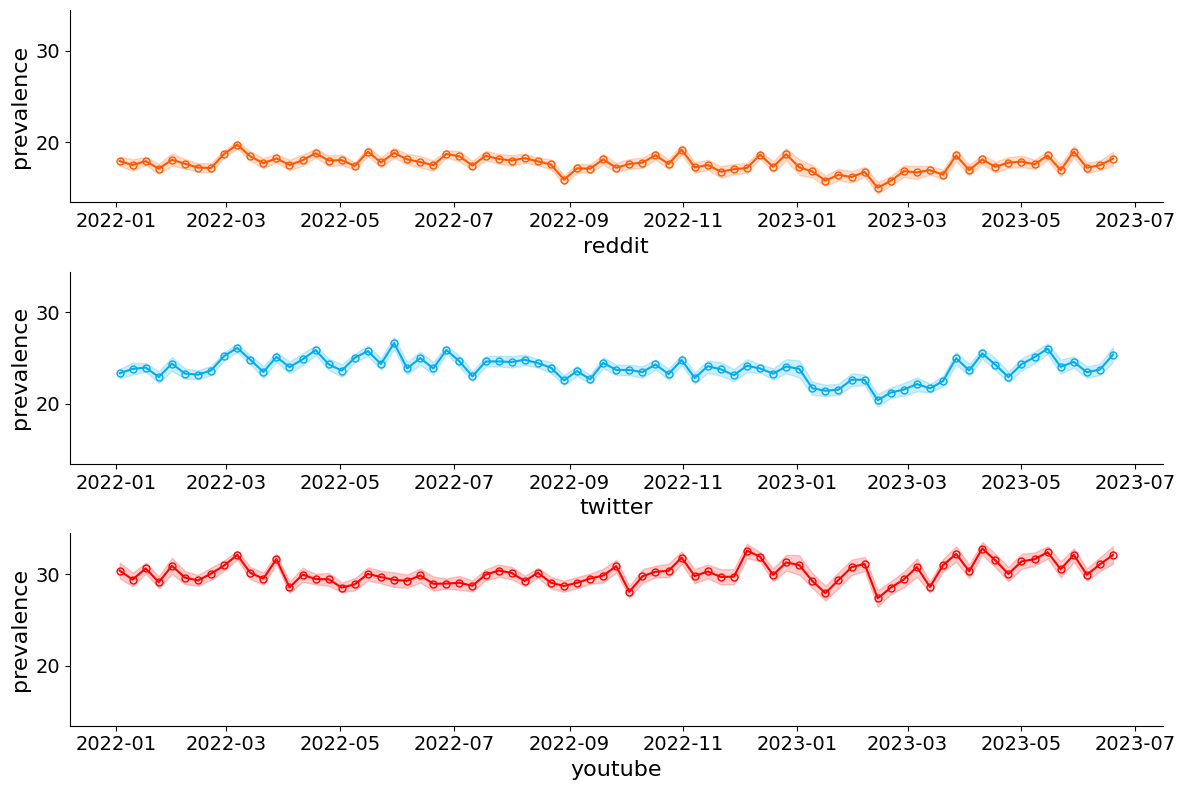

In [11]:
visualize_time_series2(ex_weekly_df)

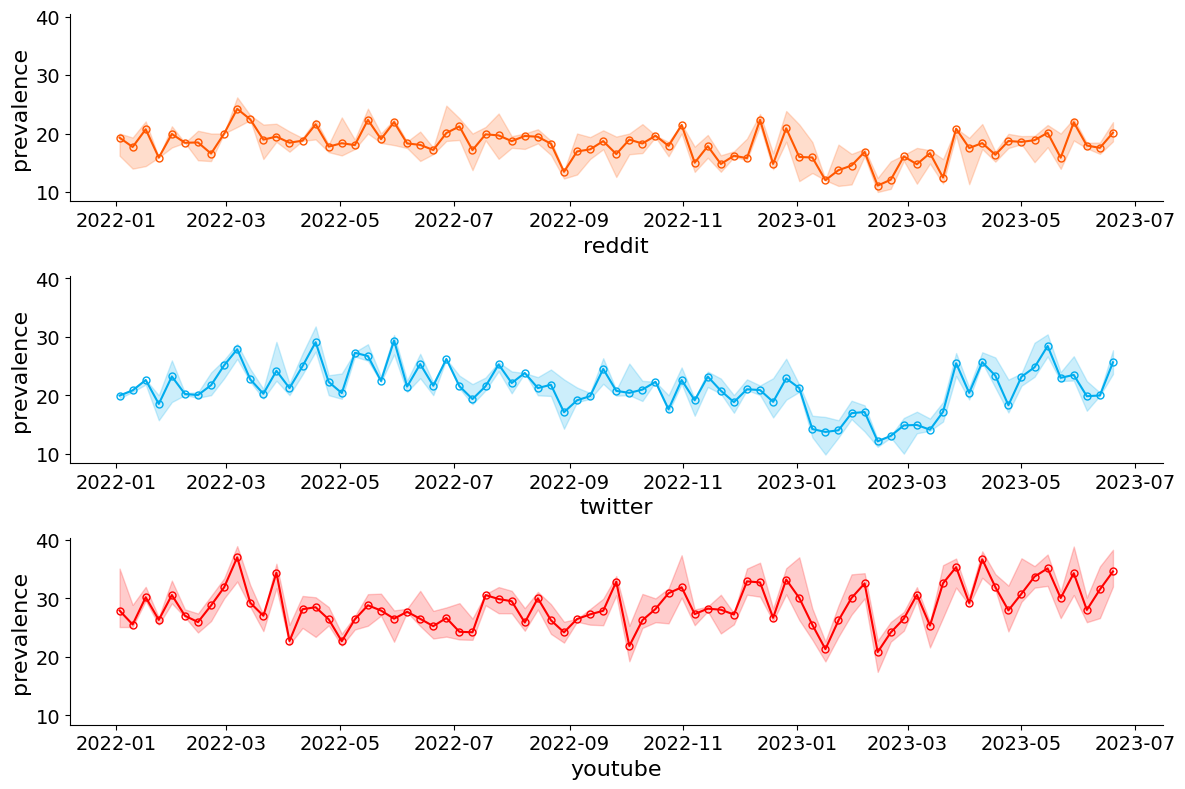

In [12]:
visualize_time_series2(in_weekly_df)

In [13]:
def visualize_time_series3(data_df1, data_df2):
    fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharey=True)

    platform_list = ['reddit', 'twitter', 'youtube']
    for ax_idx, platform in enumerate(platform_list):
        color = color_dict[platform]

        axes[ax_idx].plot_date(
            data_df1.index, 
            eval(f'data_df1.{platform}_hot_list') / eval(f'data_df1.{platform}_num_comment_list') * 100, 
            '-o', color=color, mfc='none', ms=5, label=platform)
        axes[ax_idx].fill_between(
            data_df1.index, 
            eval(f'data_df1.{platform}_hot_ub_list') / eval(f'data_df1.{platform}_num_comment_list') * 100, 
            eval(f'data_df1.{platform}_hot_lb_list') / eval(f'data_df1.{platform}_num_comment_list') * 100, 
            color=color, alpha=0.2)
        axes[ax_idx].set_xlabel(platform, fontsize=16)

        axes[ax_idx].plot_date(
            data_df2.index, 
            eval(f'data_df2.{platform}_hot_list') / eval(f'data_df2.{platform}_num_comment_list') * 100, 
            '--o', color=color, mfc='none', ms=5, label=platform)
        axes[ax_idx].fill_between(
            data_df2.index, 
            eval(f'data_df2.{platform}_hot_ub_list') / eval(f'data_df2.{platform}_num_comment_list') * 100, 
            eval(f'data_df2.{platform}_hot_lb_list') / eval(f'data_df2.{platform}_num_comment_list') * 100, 
            color=color, alpha=0.2)

    for ax in axes.ravel():
        # ax.legend(frameon=False, fontsize=14)
        ax.set_ylabel('prevalence', fontsize=16)
        ax.tick_params(axis='both', which='major', labelsize=14)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

    plt.tight_layout()

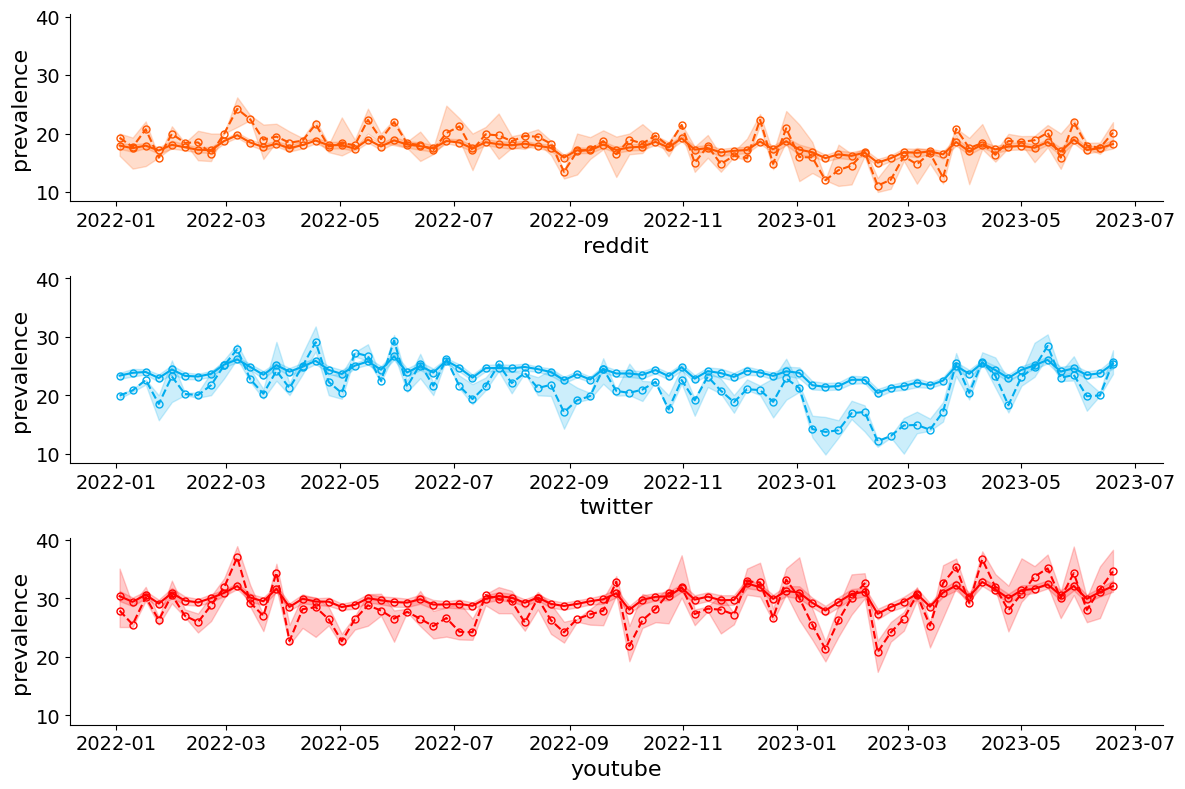

In [14]:
visualize_time_series3(ex_weekly_df, in_weekly_df)

In [29]:
def visualize_time_series4(data_df):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)

    platform_list = ['youtube', 'twitter', 'reddit']
    for ax_idx, platform in enumerate(platform_list):
        color = color_dict[platform]

        ax.plot_date(
            data_df.index, 
            eval(f'data_df.{platform}_hot_list') / eval(f'data_df.{platform}_num_comment_list') * 100, 
            '-o', color=color, mfc='none', ms=5, label=platform)
        ax.fill_between(
            data_df.index, 
            eval(f'data_df.{platform}_hot_ub_list') / eval(f'data_df.{platform}_num_comment_list') * 100, 
            eval(f'data_df.{platform}_hot_lb_list') / eval(f'data_df.{platform}_num_comment_list') * 100, 
            color=color, alpha=0.2)

    ax.legend(frameon=False, fontsize=16)
    ax.set_ylabel('prevalence', fontsize=16)
    ax.set_ylim(12, 35)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    plt.tight_layout()

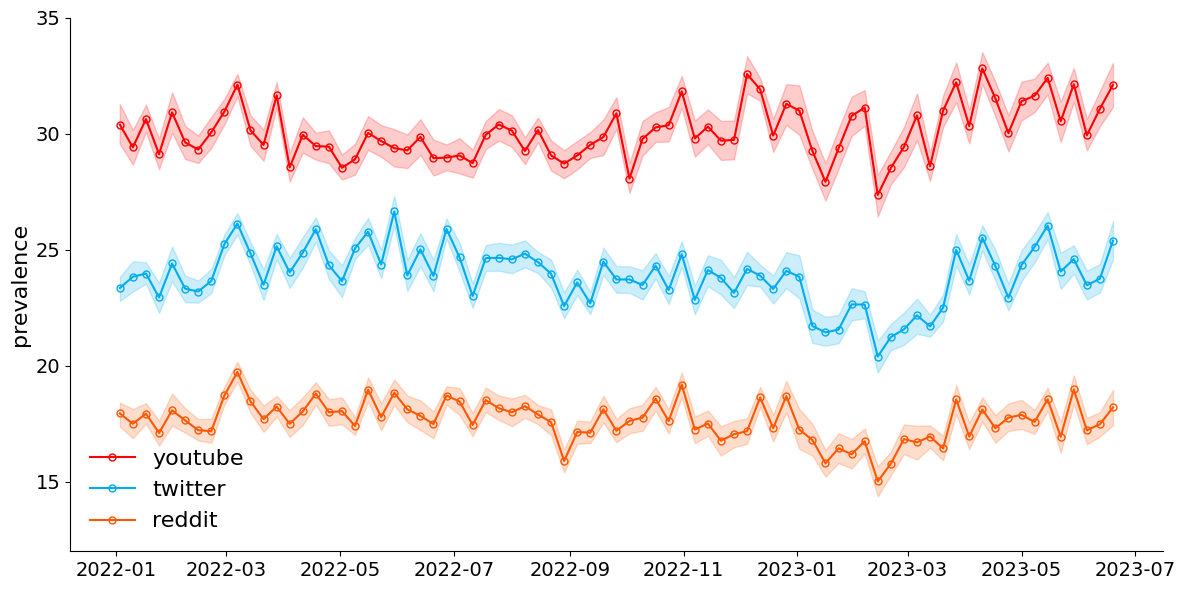

In [30]:
visualize_time_series4(ex_weekly_df)